# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_error as MAE, make_scorer
from sklearn.pipeline import  make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.dummy import DummyRegressor

import warnings
warnings.filterwarnings('ignore')

In [2]:
try:
    df = pd.read_csv('/datasets/gold_recovery_full_new.csv')
    df_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
    df_test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
except:
    df = pd.read_csv('gold_recovery_full_new.csv')
    df_train = pd.read_csv('gold_recovery_train_new.csv')
    df_test = pd.read_csv('gold_recovery_test_new.csv')

In [3]:
# Информация изучена, но для удобства закоментировал (больно много места занимает)
#df.info()

In [4]:
df.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [5]:
df.isna().sum()

date                                            0
final.output.concentrate_ag                     1
final.output.concentrate_pb                     1
final.output.concentrate_sol                  211
final.output.concentrate_au                     0
                                             ... 
secondary_cleaner.state.floatbank5_a_level      1
secondary_cleaner.state.floatbank5_b_air        1
secondary_cleaner.state.floatbank5_b_level      1
secondary_cleaner.state.floatbank6_a_air        2
secondary_cleaner.state.floatbank6_a_level      1
Length: 87, dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,19438.000000,19438.000000,19228.000000,19439.000000,19439.000000,19438.000000,19338.000000,19433.000000,19439.000000,19415.000000,...,19433.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19437.000000,19438.000000
mean,5.168470,9.978895,9.501224,44.076513,67.050208,9.688589,2.705795,10.583728,3.042467,144.624774,...,18.987674,-485.894516,15.010366,-461.078636,15.694452,-488.684065,12.198224,-487.149827,18.959024,-505.436305
std,1.372348,1.669240,2.787537,5.129784,10.125840,2.328642,0.949077,2.868782,0.922808,44.464071,...,5.411058,47.758570,4.890228,67.405524,5.510974,34.533396,5.333024,38.347312,5.550498,37.689057
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003112,...,0.000000,-799.798523,0.000000,-800.836914,-0.372054,-797.323986,0.528083,-800.220337,-0.079426,-809.741464
25%,4.251240,9.137262,7.722820,43.402215,63.299712,8.062878,2.040119,8.938947,2.461138,114.107029,...,14.975734,-500.704892,11.940294,-500.187742,10.988606,-500.458467,8.971105,-500.129462,14.983037,-500.728067
50%,5.066094,10.102433,9.218961,45.011244,68.172738,9.743623,2.748730,10.622456,2.984909,143.232103,...,18.017481,-499.837793,14.971014,-499.459786,15.000036,-499.802605,11.019433,-499.935317,19.960541,-500.048400
75%,5.895527,11.035769,10.947813,46.275313,72.686642,11.134294,3.333216,12.104271,3.571351,175.075656,...,23.012470,-498.249730,19.034162,-400.118106,18.026190,-498.384187,14.019088,-499.436708,24.003170,-499.495378
max,16.001945,17.031899,19.615720,52.756638,100.000000,19.552149,5.804178,22.317730,8.245022,265.983123,...,30.115735,-245.239184,31.269706,-6.506986,43.709931,-244.483566,27.926001,-137.740004,32.188906,-104.427459


Напишем функцию для подсчета recovery тсходя из формулы:

$$recovery=\frac{C×(F-T)}{(F×(C-T)}×100$$

* C — доля золота в концентрате после флотации/очистки (rougher.output.concentrate_au)
* F — доля золота в сырье/концентрате до флотации/очистки (rougher.input.feed_au)
* T — доля золота в отвальных хвостах после флотации/очистки (rougher.output.tail_au)

In [8]:
# функция для подсчета recovery
def recovery(C, F, T):
    
    rec = ((C*(F-T))/(F*(C-T))) * 100
    
    rec[rec<0] = np.nan
    rec[rec>100] = np.nan
    
    return rec

In [9]:
c,f,t = df_train['rougher.output.concentrate_au'], df_train['rougher.input.feed_au'], df_train['rougher.output.tail_au']
rec = recovery(c, f, t)
print(f'MAE: {MAE(df_train["rougher.output.recovery"].dropna(), rec.dropna())}')

MAE: 9.73512347450521e-15


recovery в df_train расчитан верно.

In [10]:
different_features = list(set(df_train.columns) - set(df_test.columns))
different_features

['final.output.concentrate_au',
 'primary_cleaner.output.concentrate_ag',
 'rougher.calculation.au_pb_ratio',
 'secondary_cleaner.output.tail_au',
 'rougher.output.concentrate_ag',
 'final.output.concentrate_sol',
 'rougher.output.recovery',
 'primary_cleaner.output.concentrate_au',
 'final.output.tail_sol',
 'rougher.output.tail_pb',
 'primary_cleaner.output.tail_au',
 'rougher.output.concentrate_pb',
 'final.output.concentrate_ag',
 'rougher.output.tail_au',
 'primary_cleaner.output.concentrate_sol',
 'final.output.tail_pb',
 'primary_cleaner.output.tail_pb',
 'secondary_cleaner.output.tail_pb',
 'final.output.tail_ag',
 'rougher.output.concentrate_sol',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.output.tail_sol',
 'primary_cleaner.output.concentrate_pb',
 'secondary_cleaner.output.tail_sol',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'secondary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_sol',
 'rougher

***Выводы***
* В данных множество пропусков, дату и время привести к нужному формату;
* Некоторые параметры отсутствуют в тестовой выборке, скорее всего потому, что замеряются и/или рассчитываются значительно позже. Также в тестовом наборе нет целевых признаков.

### Предобработка данных

Подготовим данные для дальнейшего Анализа:

In [11]:
# Приведем столбец с датой к нужному формату: 
datasets = [df, df_train, df_test]
for data in datasets:
    data['date'] = pd.to_datetime(data['date'])

In [12]:
df_test_target = df_test.merge(df.loc[:,['date','rougher.output.recovery','final.output.recovery']],on = 'date')
df_test_target = df_test_target.dropna()
df_test= df_test_target.loc[:,df_test.columns]
df_test = df_test.drop('date',axis =1)
df_test = df_test.dropna()

df_train_final = df_train.drop('date', axis=1)
df_train_final = df_train_final.dropna()

df_final = df.drop('date', axis=1)
df_final = df_final.dropna()

## Анализ данных

Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки.

Концентрация до флотации:

Золото: 8.266097326589135
Серебро: 8.794927425814699
Свинец: 3.598084975395446


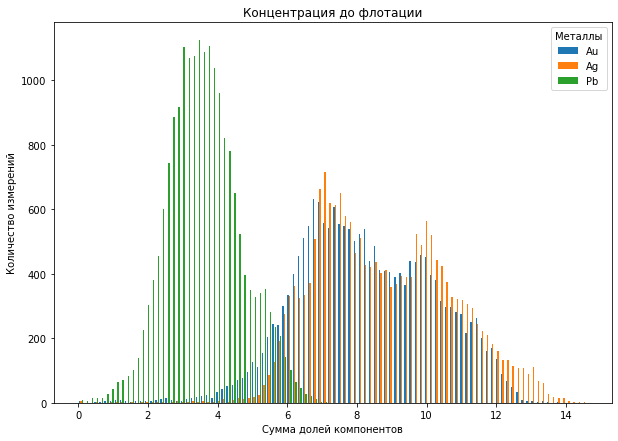

In [13]:
metalls = ['Au', 'Ag', 'Pb']
print(f'Золото: {df["rougher.input.feed_au"].mean()}\nСеребро: {df["rougher.input.feed_ag"].mean()}'
     f'\nСвинец: {df["rougher.input.feed_pb"].mean()}')
plt.figure(figsize=[10,7])
plt.hist((df['rougher.input.feed_au'], df['rougher.input.feed_ag'], df['rougher.input.feed_pb']), bins=100)
plt.legend(metalls, title = 'Металлы')
plt.xlabel('Сумма долей компонентов')
plt.ylabel('Количество измерений')
plt.title('Концентрация до флотации')
plt.show()

Концентрация после флотации:

Золото: 19.772000139486334
Серебро: 11.994759359873452
Свинец: 7.606272313194984


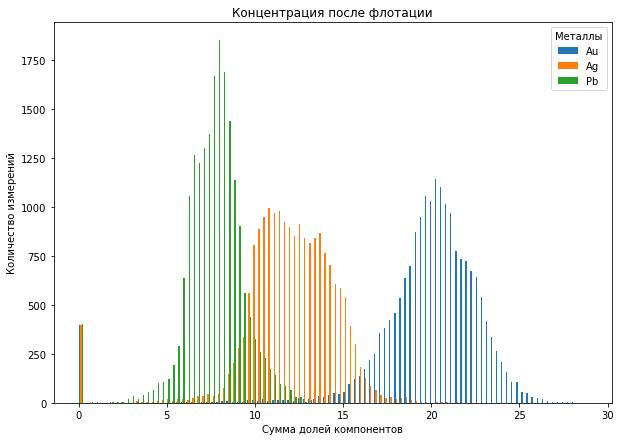

In [14]:
metalls = ['Au', 'Ag', 'Pb']
print(f'Золото: {df["rougher.output.concentrate_au"].mean()}\nСеребро: {df["rougher.output.concentrate_ag"].mean()}'
     f'\nСвинец: {df["rougher.output.concentrate_pb"].mean()}')
plt.figure(figsize=[10,7])
plt.hist((df['rougher.output.concentrate_au'], df['rougher.output.concentrate_ag'], df['rougher.output.concentrate_pb']), 
         bins=100)
plt.legend(metalls, title = 'Металлы')
plt.xlabel('Сумма долей компонентов')
plt.ylabel('Количество измерений')
plt.title('Концентрация после флотации')
plt.show()

Концентрация после первичной очистки:

Золото: 32.1194004078766
Серебро: 8.442408077719056
Свинец: 9.829529774200587


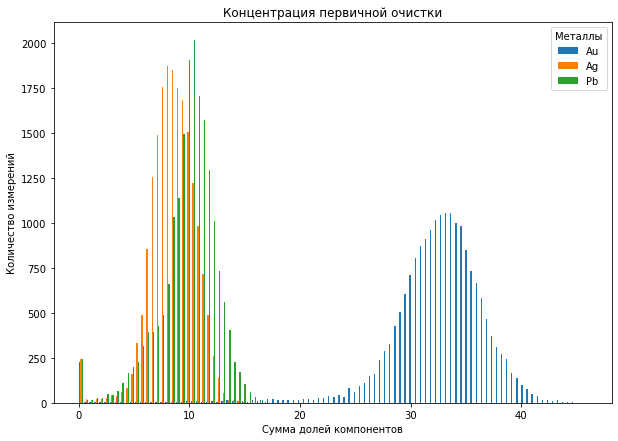

In [15]:
metalls = ['Au', 'Ag', 'Pb']
print(f'Золото: {df["primary_cleaner.output.concentrate_au"].mean()}\nСеребро: {df["primary_cleaner.output.concentrate_ag"].mean()}'
     f'\nСвинец: {df["primary_cleaner.output.concentrate_pb"].mean()}')
plt.figure(figsize=[10,7])
plt.hist((df['primary_cleaner.output.concentrate_au'], df['primary_cleaner.output.concentrate_ag'], 
          df['primary_cleaner.output.concentrate_pb']), 
         bins=100)
plt.legend(metalls, title = 'Металлы')
plt.xlabel('Сумма долей компонентов')
plt.ylabel('Количество измерений')
plt.title('Концентрация первичной очистки')
plt.show()

Концентрация поле вторичной очистки:

Золото: 44.076512941952664
Серебро: 5.168470373676826
Свинец: 9.978894911181714


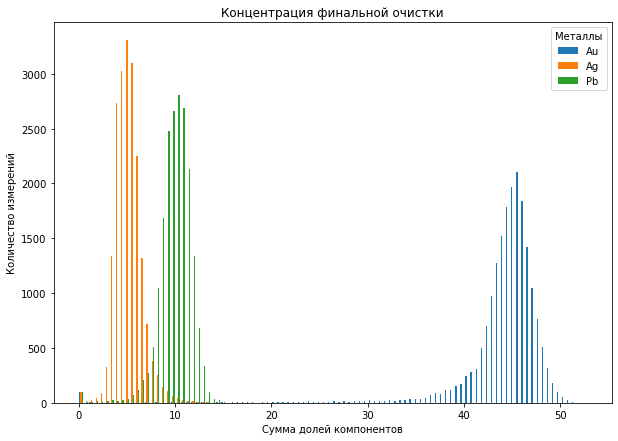

In [16]:
metalls = ['Au', 'Ag', 'Pb']
print(f'Золото: {df["final.output.concentrate_au"].mean()}\nСеребро: {df["final.output.concentrate_ag"].mean()}'
     f'\nСвинец: {df["final.output.concentrate_pb"].mean()}')
plt.figure(figsize=[10,7])
plt.hist((df['final.output.concentrate_au'], df['final.output.concentrate_ag'], df['final.output.concentrate_pb']), 
         bins=100)
plt.legend(metalls, title = 'Металлы')
plt.xlabel('Сумма долей компонентов')
plt.ylabel('Количество измерений')
plt.title('Концентрация финальной очистки')
plt.show()

***Выводы:***
 
* Концентрация золота растет на всех этапах очистки;
* После первичной очистки концентрация Серебра падает;
* Концентрация свинца медленно растет и после финальной очистки концентрация свинца  в 3 раза больше, чем до флотации.

Сравним распределения размеров гранул сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.

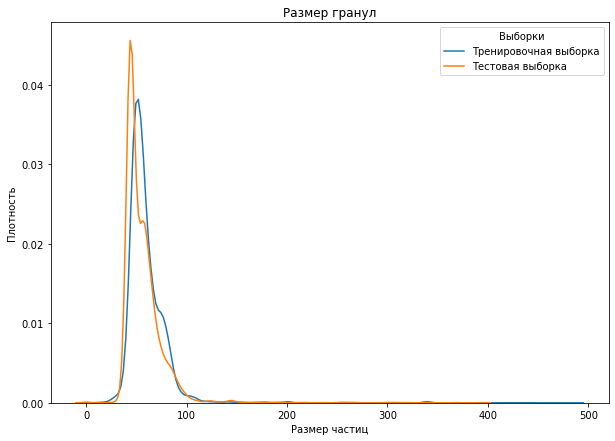

In [17]:
plt.figure(figsize=[10,7])
for data,name in zip([df_train, df_test], ['Тренировочная выборка','Тестовая выборка']):
    subset = data['rougher.input.feed_size']
    sns.distplot(subset, hist = False, kde = True,
                 label = name)
plt.xlabel('Размер частиц')
plt.ylabel('Плотность')
plt.legend(title = 'Выборки')
plt.title('Размер гранул');

Размер гранул, в тестовой и тренировочной выборках, отличается незначительно. Предсказания моделей будет близко к истинному.

Исследуем суммарную концентрацию всех веществ на разных стадиях:

* в сырье; 
* в черновом; 
* финальном концентратах.

In [18]:
rougher_input_feed = (df['rougher.input.feed_au'] + 
                                        df['rougher.input.feed_ag'] + 
                                        df['rougher.input.feed_pb'] +
                                        df['rougher.input.feed_sol'])
rougher_conc_sum = (df['rougher.output.concentrate_au'] + 
                                        df['rougher.output.concentrate_ag'] + 
                                        df['rougher.output.concentrate_pb'] +
                                        df['rougher.output.concentrate_sol'])
primary_conc_sum = (df['primary_cleaner.output.concentrate_au'] + 
                                                df['primary_cleaner.output.concentrate_ag'] + 
                                                df['primary_cleaner.output.concentrate_pb'] +
                                                df['primary_cleaner.output.concentrate_sol'])

secondary_conc_sum = (df['secondary_cleaner.output.tail_au'] + 
                                                df['secondary_cleaner.output.tail_ag'] + 
                                                df['secondary_cleaner.output.tail_pb'] +
                                                df['secondary_cleaner.output.tail_sol'])
final_conc_sum = (df['final.output.concentrate_au'] + 
                                      df['final.output.concentrate_ag'] + 
                                      df['final.output.concentrate_pb'] +
                                      df['final.output.concentrate_sol'])



df_conc = pd.DataFrame()
df_conc['Дата'] = df['date']
df_conc['исходное сырье'] = rougher_input_feed
df_conc['флотация'] = rougher_conc_sum
df_conc['первичная очистка'] = primary_conc_sum
df_conc['вторичная очистка (хвосты)'] = secondary_conc_sum
df_conc['финальный концентрат'] = final_conc_sum

#df_conc.head()

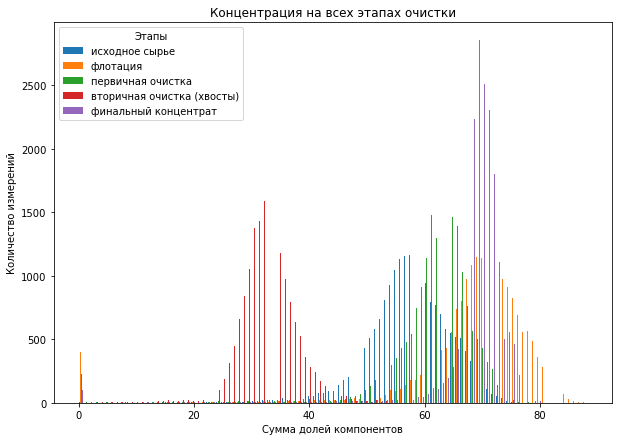

In [19]:
columns = ['исходное сырье', 'флотация', 'первичная очистка', 'вторичная очистка (хвосты)', 'финальный концентрат']

plt.figure(figsize=[10,7])
plt.hist((df_conc['исходное сырье'], df_conc['флотация'], df_conc['первичная очистка'], 
          df_conc['вторичная очистка (хвосты)'],
          df_conc['финальный концентрат']), bins=100)

plt.legend(columns, title = 'Этапы')
plt.xlabel('Сумма долей компонентов')
plt.ylabel('Количество измерений')
plt.title('Концентрация на всех этапах очистки')
plt.show()

Наблюдается увеличение концентрации веществ, на каждом последующем этапе очистки. Также наблюдаются аномалии около нулевых значений.

## Модель

Подготовим необходимые признаки для обучения моделей:

In [20]:
features_train_rougher = df_final.loc[:,df_test.columns]
target_train_rougher = df_final['rougher.output.recovery']
features_train_final = features_train_rougher 
target_train_final = df_final['final.output.recovery']
target_test_rougher = df_test_target["rougher.output.recovery"]
target_test_final = df_test_target["final.output.recovery"]

Напишем функцию для вычисления итоговой sMAPE(англ. Symmetric Mean Absolute Percentage Error, «симметричное среднее абсолютное процентное отклонение»):

$$sMAPE = \frac{1}{N} \sum_{i=1}^{N} \frac{|y_i - \hat{y_i}|}{(|y_i| + |\hat{y_i}|) / 2} × 100%$$

где:

* \\(yi\\) - значение целевого признака для объекта с порядковым номером i в выборке, на которой измеряется качество;
* \\(\hat{y_i}\\) - значение предсказания для объекта с порядковым номером i, например, в тестовой выборке;
* \\(N\\) - количество объектов в выборке;
* \\(∑Ni=1\\) - суммирование по всем объектам выборки (i меняется от 1 до N).

Итоговый sMAPE:

$$sMAPE(итоговый) = 25\% × sMAPE(rougher) + 75\% × sMAPE(final)$$ 

In [21]:
#  sMAPE
def sMAPE(target, predictions):
    smape = np.mean(abs(target - predictions)/((abs(target)+abs(predictions))/2))*100
    return smape

In [22]:
# Итоговый  sMAPE
def final_smape(rougher, final):
    return (0.25*rougher + 0.75*final)

Создадим scorer для того, чтобы использовать его при кросс-валидации:

In [ ]:
scoring = make_scorer(sMAPE,greater_is_better=False)

Подготовим модели для обучения(при помощи PipeLine):

In [24]:
model = make_pipeline(StandardScaler(),RandomForestRegressor())
model_2 = make_pipeline(StandardScaler(),DecisionTreeRegressor())

Зададим границы параметров обучения для GridSearchCV:

In [25]:
params_RF = {'randomforestregressor__n_estimators':[1, 100, 10], 'randomforestregressor__max_depth':[1, 22, 2]}
params_DT= {'decisiontreeregressor__max_depth':[1, 22, 2]}

In [26]:
grid_rougher_RF = GridSearchCV(model,param_grid = params_RF,scoring=scoring)
grid_final_RF = GridSearchCV(model,param_grid = params_RF,scoring=scoring)
grid_rougher_DT = GridSearchCV(model_2,param_grid = params_DT,scoring=scoring)
grid_final_DT = GridSearchCV(model_2,param_grid = params_DT,scoring=scoring)

Обучим модели:

In [27]:
grid_rougher_RF.fit(features_train_rougher,target_train_rougher)
grid_final_RF.fit(features_train_final,target_train_final)
grid_rougher_DT.fit(features_train_rougher,target_train_rougher)
grid_final_DT.fit(features_train_final,target_train_final);

In [28]:
best_est_rougher = grid_rougher_RF.best_estimator_
best_est_final = grid_final_RF.best_estimator_
best_est_rougher_DT = grid_rougher_DT.best_estimator_
best_est_final_DT = grid_final_DT.best_estimator_

In [29]:
print(f'Лучшие параметры модели:\nRF_r_est: {best_est_rougher}\nRF-f_est: {best_est_final}\n',
     f'DT_r_est: {best_est_rougher_DT}\nDT_f_est: {best_est_final_DT}')

Лучшие параметры модели:
RF_r_est: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=2, n_estimators=10))])
RF-f_est: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=2, n_estimators=10))])
 DT_r_est: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeregressor', DecisionTreeRegressor(max_depth=1))])
DT_f_est: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeregressor', DecisionTreeRegressor(max_depth=1))])


Найдем лучшую модель(среди обученных):

In [30]:
best_score_rougher = grid_rougher_RF.best_score_
best_score_final = grid_final_RF.best_score_
best_score_rougher_DT = grid_rougher_DT.best_score_
best_score_final_DT = grid_final_DT.best_score_

In [31]:
print(f' Rougher:\nRandomForest: {best_score_rougher}\nDecisionTree: {best_score_rougher_DT}\n',
     f'Final:\nRandomForest: {best_score_final}\nDecisionTree: {best_score_final_DT}')

 Rougher:
RandomForest: -10.916116279503271
DecisionTree: -11.290246032085715
 Final:
RandomForest: -8.421960895801819
DecisionTree: -8.772035682463233


Лучше всего себя показала модель случайного леса.

In [32]:
print(f' Итоговый sMAPE RandomForest: {final_smape(best_score_rougher,best_score_final)}\n',
      f'Итоговый sMAPE DecisionTree: {final_smape(best_score_rougher_DT,best_score_final_DT)}')

 Итоговый sMAPE RandomForest: -9.045499741727182
 Итоговый sMAPE DecisionTree: -9.401588269868853


Случайный лес показал наименьшую ошибку.

Проверим результаты на тестовой выборке:

In [33]:
rogher_test = grid_rougher_RF.predict(df_test)
final_test = grid_final_RF.predict(df_test)
final_smape(sMAPE(target_test_rougher,rogher_test),sMAPE(target_test_final,final_test));

Сравним нащу модель с константной:

In [34]:
model_3 = DummyRegressor(strategy='median')
model_3_final = DummyRegressor(strategy='median')

In [35]:
model_3.fit(features_train_rougher, target_train_rougher)
model_3_final.fit(features_train_final, target_train_final);

In [36]:
model_3_rougher = model_3.predict(final_test)
model_3_final_pred = model_3_final.predict(final_test)

In [37]:
print(f' Итоговый sMAPE RandomForest: {final_smape(sMAPE(target_test_rougher,rogher_test),sMAPE(target_test_final,final_test))}\n',
f'Итоговый sMAPE Константной модеи: {final_smape(sMAPE(target_test_rougher, model_3_rougher), sMAPE(target_test_final, model_3_final_pred))}')

 Итоговый sMAPE RandomForest: 8.342004973374062
 Итоговый sMAPE Константной модеи: 8.71573183035113


## Выводы:

* Провели исследовательский анализ данных, проверили наличие пропусков, дубликатов. Некоторые параметры недоступны, потому что замеряются и/или рассчитываются значительно позже. Из-за этого в тестовой выборке отсутствуют некоторые признаки, которые есть в обучающей. Также в тестовом наборе нет целевых признаков;
* Обнаружили, что концентрация золота и свинца увеличивается с каждым этапом, а концентрация серебра снижается после после первичной очистки;
* Размер гранул, в тренировочной и тестовой выборках, близки по размерам;
* Лучшей моделью оказалась модель случайного леса (RandomForest) , со значением итоговой sMAPE 8.37( у константной модели sMAPE равен 8.71).